# Multiple_Linear_Regression_50_startups

# Importing Data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [54]:
stp = pd.read_csv('50_Startups.csv')

In [55]:
stp

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [56]:
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [57]:
stp.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [58]:
stp2=stp.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
c=stp2.corr()
c

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


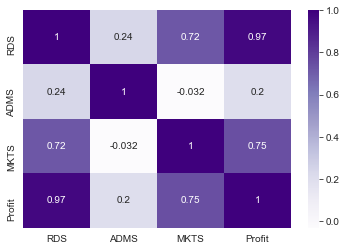

In [59]:
sns.heatmap(c,annot=True,cmap='Purples')
plt.show()

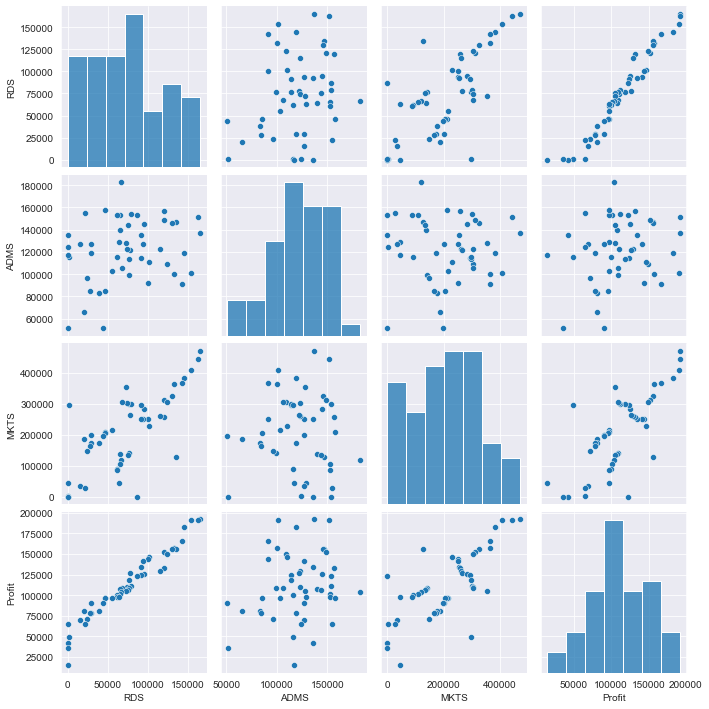

In [60]:
sns.set_style(style='darkgrid')
sns.pairplot(stp2)

# Model Building

In [92]:
model1=smf.ols('Profit~RDS+ADMS+MKTS', data=stp2).fit()

In [93]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           4.53e-30
Time:                        21:16:29   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

therefore from above summary we can see that the p-values of ADMS and MKTS are greater than 0.05 indicating that ADMS and MKTS are insignificant. RDS on other hand is significant

# Simple Linear Regression
Since the ADMS and MKTS are insignificant we will build individual and combination SLR models of both ADMS and MKTS to decide which feature can be dropped

In [63]:
ml_a = smf.ols('Profit~ADMS',data=stp2).fit()

In [64]:
ml_a.pvalues # ADMS is insignificant 

Intercept    0.003824
ADMS         0.162217
dtype: float64

In [65]:
ml_m= smf.ols('Profit~MKTS',data=stp2).fit() # MKTS is significant

In [66]:
ml_m.pvalues

Intercept    4.294735e-10
MKTS         4.381073e-10
dtype: float64

In [67]:
ml_am = smf.ols('Profit~MKTS+ADMS',data=stp2).fit() # both variable are significant

In [68]:
ml_am.pvalues

Intercept    2.589341e-01
MKTS         9.727245e-11
ADMS         1.729198e-02
dtype: float64

# Model Deletion Diagnostics

# Finding the influencers/outliers

# 1. Cook's Distance

In [69]:
(c,_)=model1.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

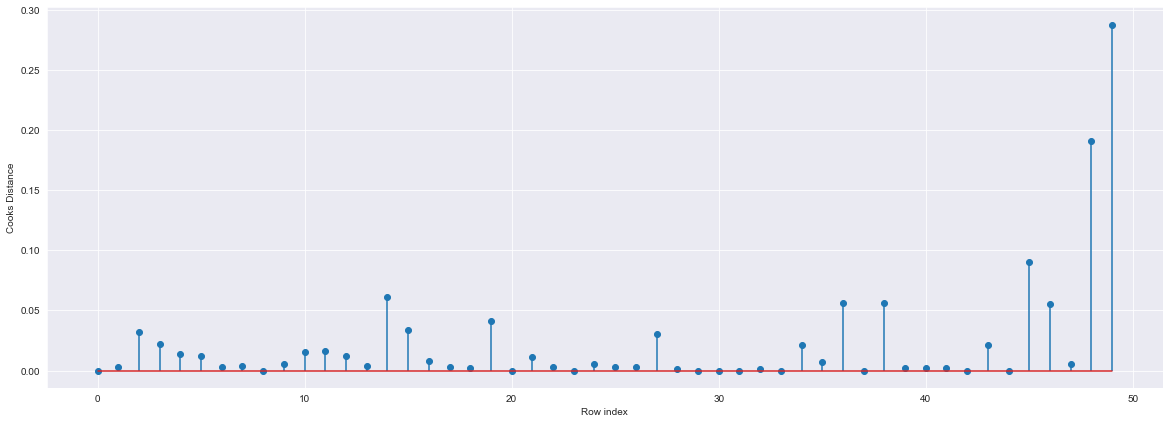

In [70]:
#plotting the influencers
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(stp2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [71]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# 2. High influence point 

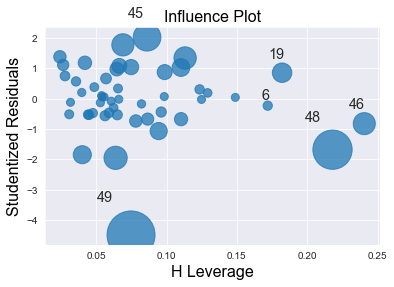

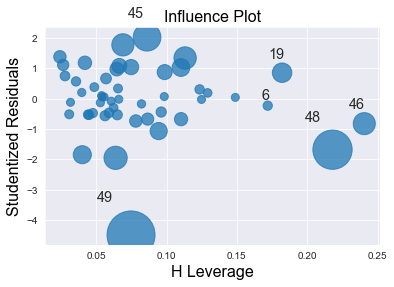

In [72]:
sm.graphics.influence_plot(model1)

From above plot it can be seen that 48 and 49 are the major influencers so we can drop them from out dataset and improve our model. 

In [73]:
stp2[stp2.index.isin([48, 49])]

,RDS,ADMS,MKTS,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


#  Improving Model 

In [74]:
stp3=stp2.drop(stp2.index[[48,49]],axis=0).reset_index(drop=True)
stp3

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [75]:
model2=model1=smf.ols('Profit~RDS+ADMS+MKTS', data=stp3).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           2.03e-31
Time:                        21:15:45   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RDS            0.7895      0.036     21.718      0.000       0.716       0.863
ADMS          -0.0633      0.044     -1.442      0.156      -0.152       0.025
MKTS           0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation

# 1. Calculating VIF
Calculating the VIF values to check if there is any dependency amongst the input variables 

In [76]:
rsq_r=smf.ols("RDS~ADMS+MKTS",data=stp3).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=stp3).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=stp3).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.250972
1,ADMS,1.196016
2,MKTS,2.229867


It can be seen that none of the VIF values are greater than 10. So there is no dependency amongst the input variables

# 2. Residual Analysis

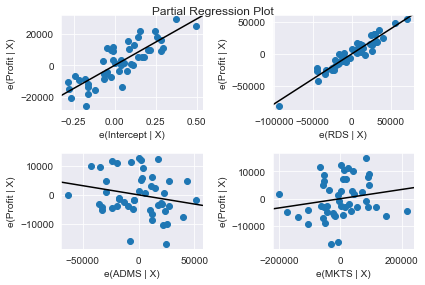

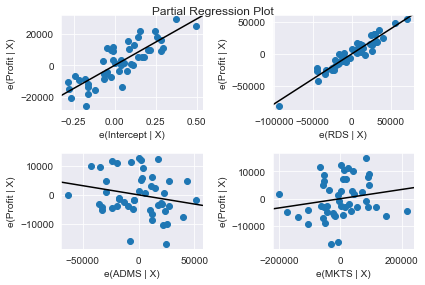

In [77]:
sm.graphics.plot_partregress_grid(model2)

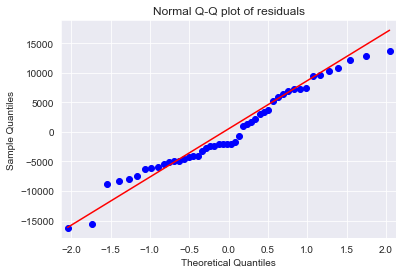

In [78]:
qqplot=sm.qqplot(model2.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [79]:
def get_standardized_values(vals) : return (vals-vals.mean())/vals.std() 

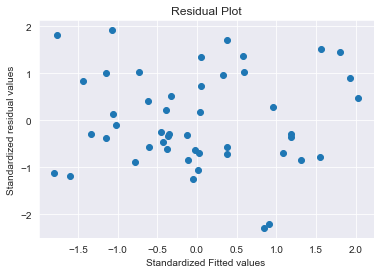

In [80]:
plt.scatter(get_standardized_values(model2.fittedvalues),
            get_standardized_values(model2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Final model

In [81]:
model3 = smf.ols('Profit~RDS+ADMS+MKTS',data = stp3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           2.03e-31
Time:                        21:15:47   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RDS            0.7895      0.036     21.718      0.000       0.716       0.863
ADMS          -0.0633      0.044     -1.442      0.156      -0.152       0.025
MKTS           0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
while model3.rsquared < 0.99:
     for c in [np.max(c)>1]:
        model3=smf.ols("Profit~RDS+ADMS+MKTS",data=stp3).fit()
        (c,_)=model3.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        stp3=stp3.drop(stp3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        stp3
     else:
        final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=stp3).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.9831149926392769
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improved to 0.9858356627471713
Thus model accuracy is improv

In [83]:
    final_model.rsquared, final_model.aic

(0.9882757054424702, 515.7400263290039)

In [84]:
stp3 # dataset of final model after model deletion diagnostic

,RDS,ADMS,MKTS,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


# Prediction of final model 

In [85]:
pred=final_model.predict(stp3)
pred

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [86]:
data=[stp3.Profit,pred]
data

[0     166187.94
 1     156991.12
 2     155752.60
 3     152211.77
 4     149759.96
 5     134307.35
 6     125370.37
 7     124266.90
 8     118474.03
 9     108733.99
 10    108552.04
 11    107404.34
 12    105733.54
 13    103282.38
 14    101004.64
 15     99937.59
 16     97483.56
 17     97427.84
 18     96778.92
 19     96712.80
 20     96479.51
 21     89949.14
 22     81005.76
 23     78239.91
 24     77798.83
 25     71498.49
 26     65200.33
 Name: Profit, dtype: float64,
 0     165589.539700
 1     158552.826483
 2     156789.000710
 3     149524.698853
 4     150122.356712
 5     126598.769555
 6     130104.785747
 7     127878.387928
 8     117298.757074
 9     111329.242429
 10    110009.916133
 11    102331.717613
 12    109661.804131
 13    103462.767086
 14    101874.612012
 15     97655.794577
 16     97872.919535
 17     96858.382686
 18     98654.449007
 19     93583.600868
 20     91186.568204
 21     88571.938968
 22     84521.312916
 23     78528.002935
 24   

<AxesSubplot:>

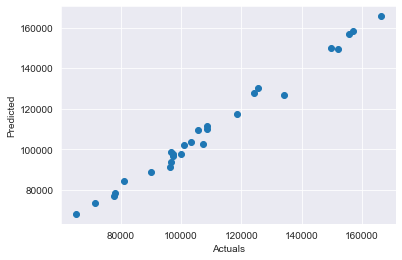

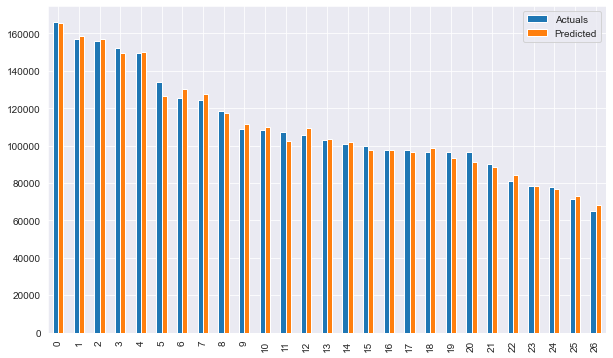

In [87]:
res=res = pd.DataFrame({'Actuals':data[0], 'Predicted':data[1]})
plt.scatter(x=res['Actuals'], y=res['Predicted'])
plt.ylabel('Predicted')
plt.xlabel('Actuals')
    
res.plot(kind='bar',figsize=(10,6))

# Hence the final model predicts data with 98.8% accuracy

In [94]:
d2={'Prep_Models':['Model1','Model2','Final_Model'],'Rsquared':[model1.rsquared, model2.rsquared, final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model1,0.950746
1,Model2,0.962677
2,Final_Model,0.988276


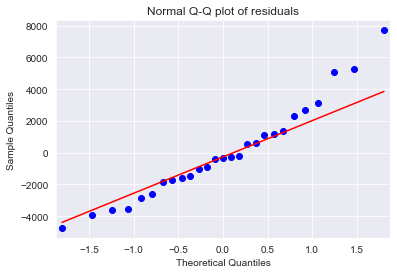

In [89]:
qqplot=sm.qqplot(final_model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

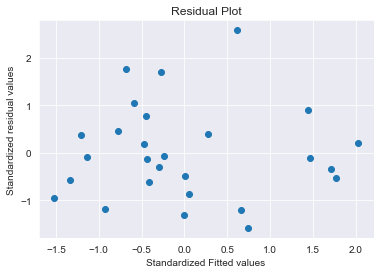

In [90]:
def get_standardized_values(vals) : return (vals-vals.mean())/vals.std() 
plt.scatter(get_standardized_values(final_model.fittedvalues),
            get_standardized_values(final_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [91]:
finalmodel_testres= res["Actuals"]-res["Predicted"]
finalmodel_testrmse = np.sqrt(np.mean(finalmodel_testres*finalmodel_testres))
finalmodel_testrmse

2932.6289344033544